In [ ]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_door(x): return x[0].isupper()

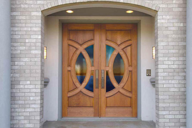

In [3]:
im = PILImage.create('door.jpg')
im.thumbnail((192, 192))
im

In [5]:
#|export
learn = load_learner('model.pkl')

In [7]:
learn.predict(im)

('door', TensorBase(0), TensorBase([0.9961, 0.0039]))

In [11]:
#|export
categories = ('Door', 'Window')

def classify_image(img):
    pred,idx,probs = learn.predict(im)
    return dict(zip(categories, map(float, probs)))

In [13]:
classify_image(im)

{'Door': 0.9960601925849915, 'Window': 0.0039397478103637695}

In [15]:
#|export
image = gr.inputs.Image(shape=(192,192))
label= gr.outputs.Label()
examples = ['door.jpg', 'window.jpg', 'doorwindow.jpg']

interface = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
interface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x28cb6dba0>, 'http://127.0.0.1:7860/', None)

In [21]:
## EXPORT

import nbdev
nbdev.export.nb_export('app.ipynb')
